In [214]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os
import numpy as np
from cycler import cycler

## Setup headers and fonts

plt.rc('font', family='sans-serif')
# plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})        # use LaTeX

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams.update({'font.size': 12})




Header = ["Sources", "Targets", "DirectSumComparison","NumSources","NumTargets","Theta","Order","TreeType","MaxParNode", "BatchSize", "Kappa",
          "PotentialType","sflag","pflag","p",
          "loading-data-time", "setup-time-min","setup-time-max", "setup-time-avg?", 
          "unknownTime4", "unknownTime5","unknownTime6", 
          "cp-time7", "cp-time8", "cp-time9", 
          "treecode-time-min", "treecode-time-max", "treecode-time-avg?", "time13",
          "dpengglob", "tpengglob", "abs_pengerr", "RelativeError", "inferr", "relinferr", "2-norm Error", "Rel. 2-Norm Error", "NumDevices"]


plotsDir='/Users/nathanvaughn/Documents/GitHub/KITC/paper-runs/plots/'

<IPython.core.display.Javascript object>


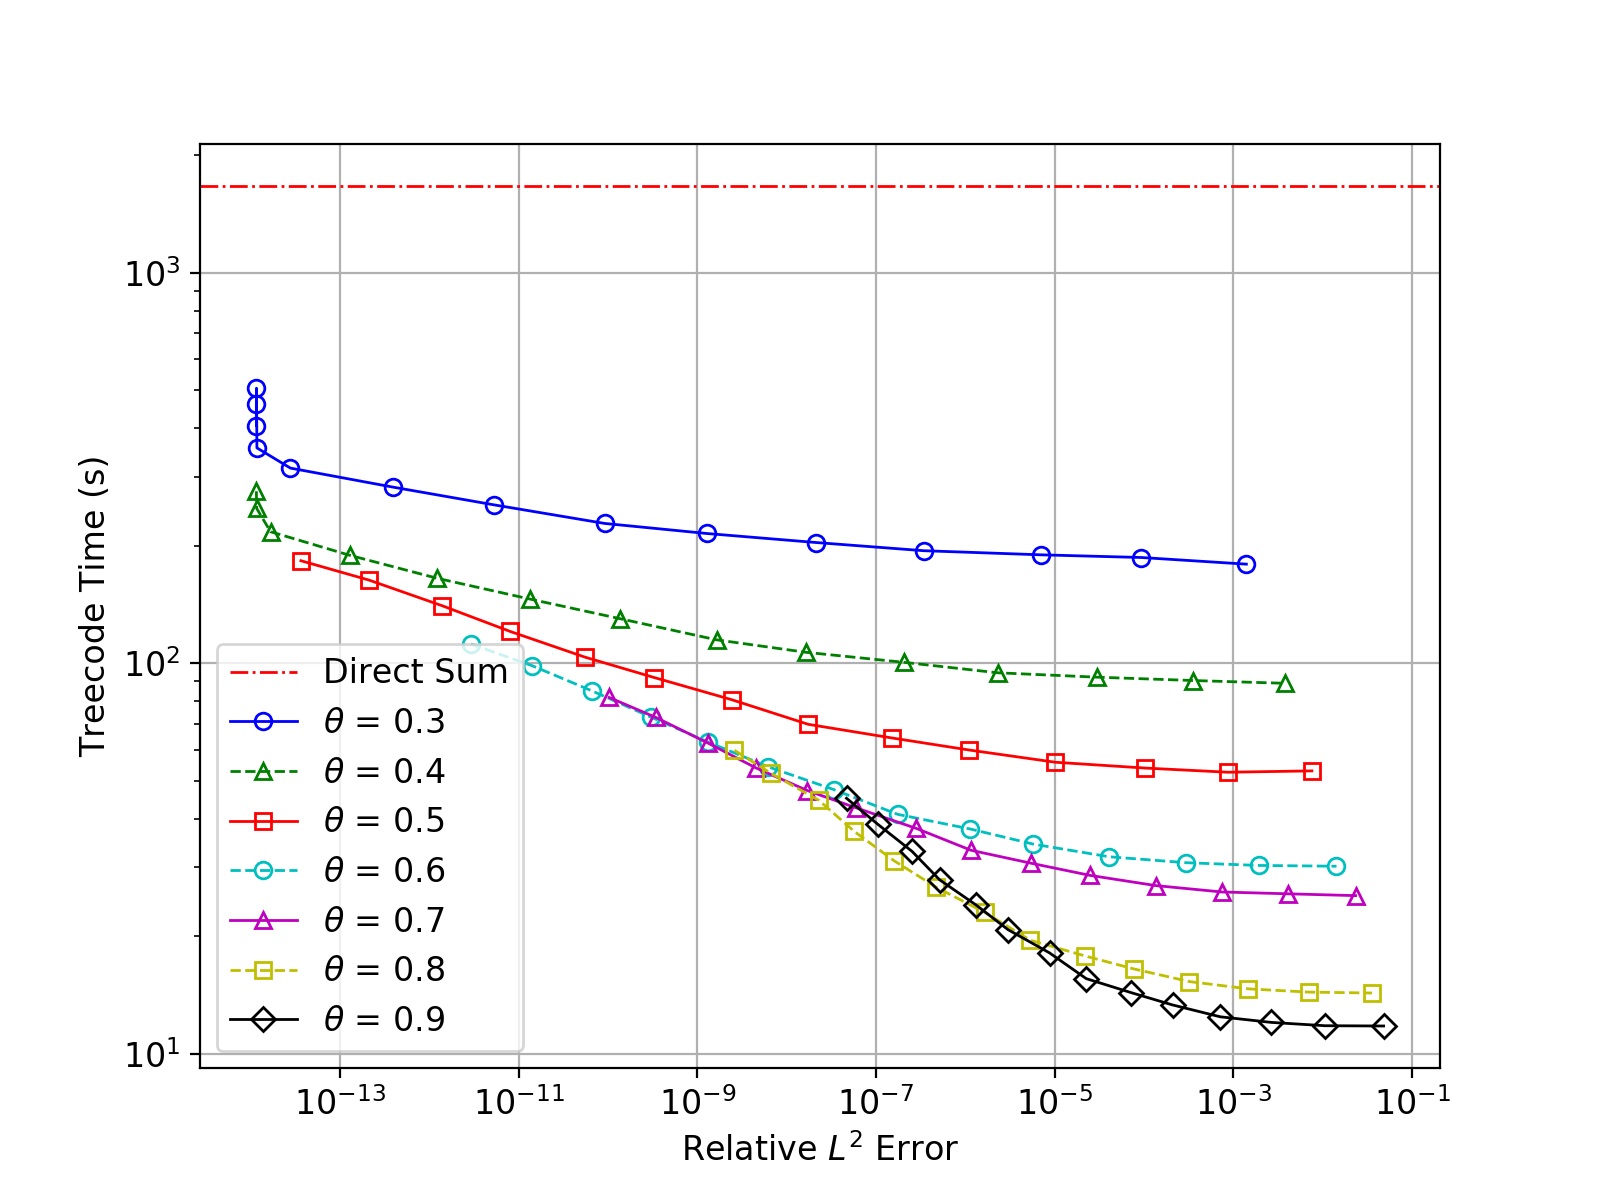

Saving figure to:  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/lagrange-coulomb.png


<IPython.core.display.Javascript object>


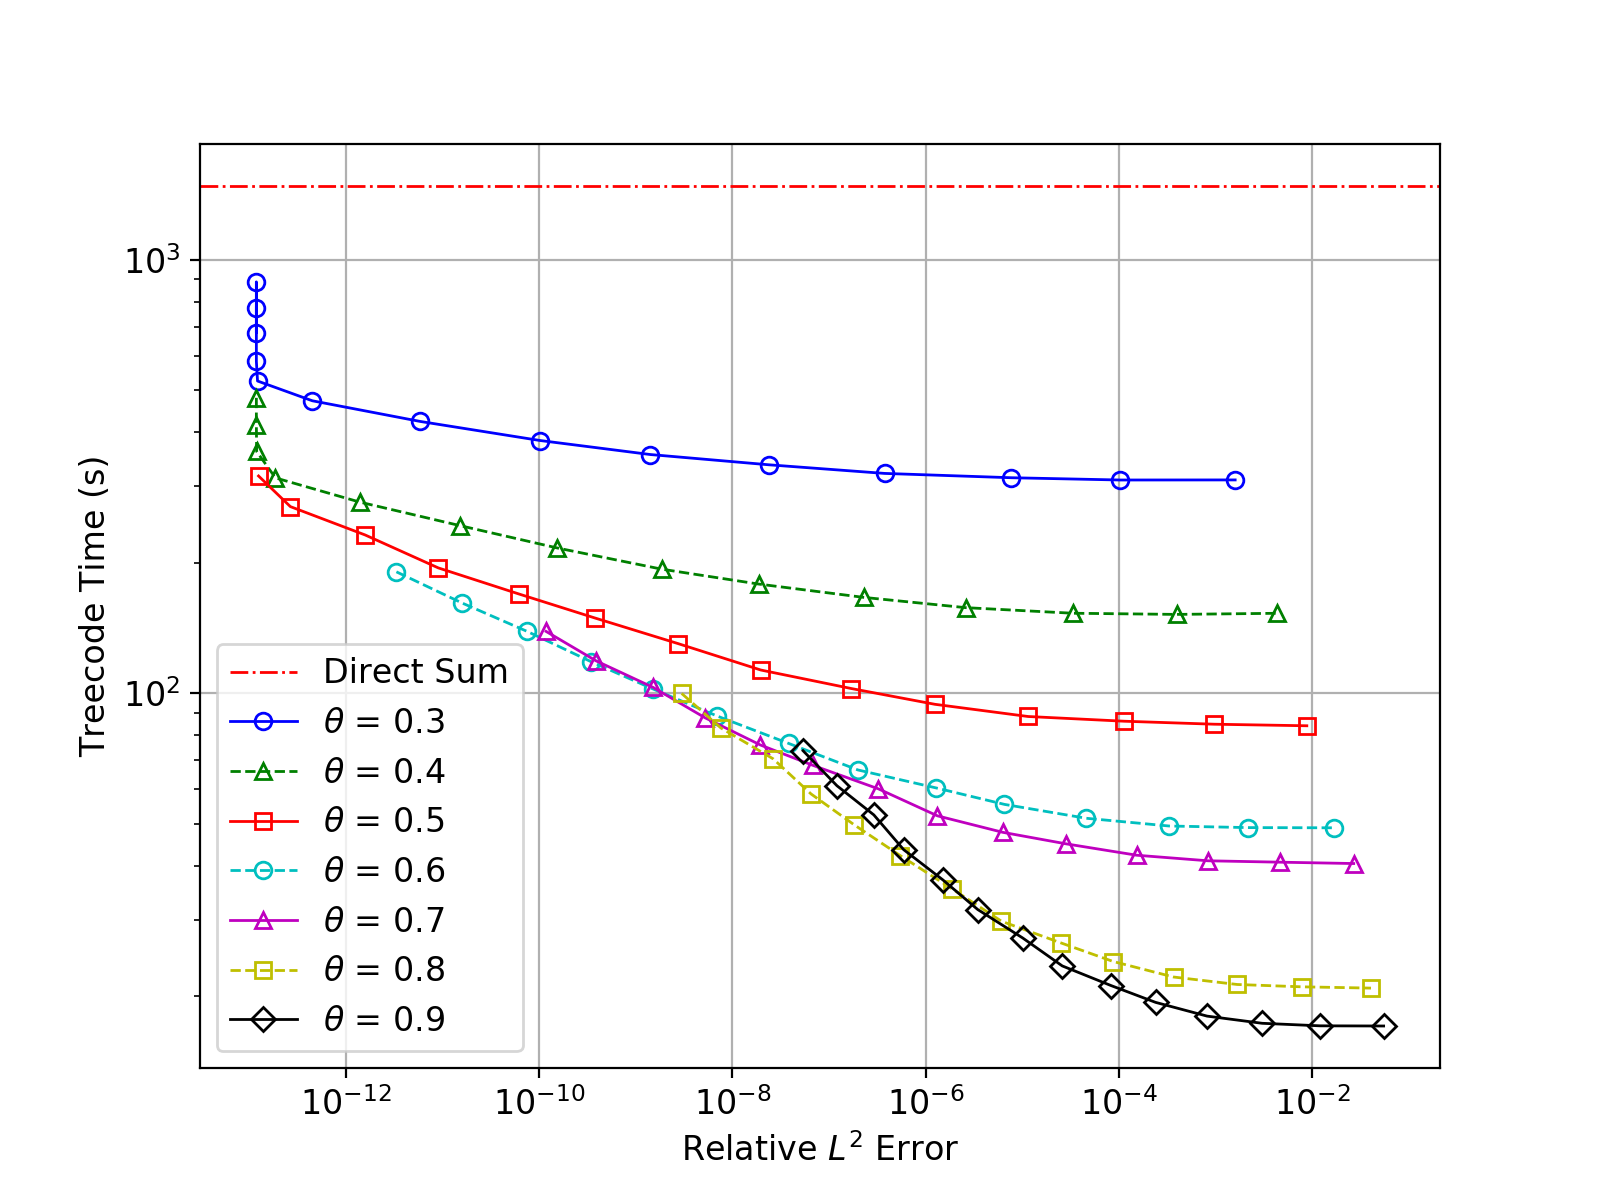

Saving figure to:  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/lagrange-yukawa.png


In [100]:
## Figure 1: Lagrange Accuracy vs. Time

## Load Dataframe
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/treecodeVersusDirectSum/'

coulombFile='coulomb.csv' 
yukawaFile='yukawa.csv' 
df_coulomb = pd.read_csv(resultsDir + coulombFile, names=Header)
df_yukawa = pd.read_csv(resultsDir + yukawaFile, names=Header)

df_coulomb['Total-Time'] = df_coulomb["setup-time-max"] + df_coulomb["treecode-time-max"]
df_yukawa['Total-Time'] = df_yukawa["setup-time-max"] + df_yukawa["treecode-time-max"]
coulomb_hlines={1668}
yukawa_hlines={1479}


## Plotting function
def treecode_accuracy_vs_time(df,A,B,C,hlines={},save=False):
    default_cycler =  ( cycler(marker=['o', '^', 's','o', '^', 's','D']) +  
                        cycler(linestyle=['-','--','-','--','-','--','-']) + 
                        cycler('color', 'bgrcmyk') )
#     default_cycler = cycler('color', 'kbgrcmy')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))
    
    for hline in hlines:
        plt.axhline(y=hline, color='r', linestyle='-.', label='Direct Sum')

    grouped = df.groupby(C)
    for name,group in grouped:
        group.plot(x=B, y=A, ax=ax, fillstyle='none', loglog=True,label=r'$\theta$ = %1.1f'%(name))
        
    plt.xlabel('Relative $L^2$ Error')
    plt.ylabel('Treecode Time (s)')
    
    
    plt.grid()    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        print('Saving figure to: ', plotsDir+saveID+'.png')
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()

treecode_accuracy_vs_time(df_coulomb,'Total-Time','Rel. 2-Norm Error','Theta',hlines=coulomb_hlines,save='lagrange-coulomb')
treecode_accuracy_vs_time(df_yukawa,'Total-Time','Rel. 2-Norm Error','Theta',hlines=yukawa_hlines,save='lagrange-yukawa')

<IPython.core.display.Javascript object>


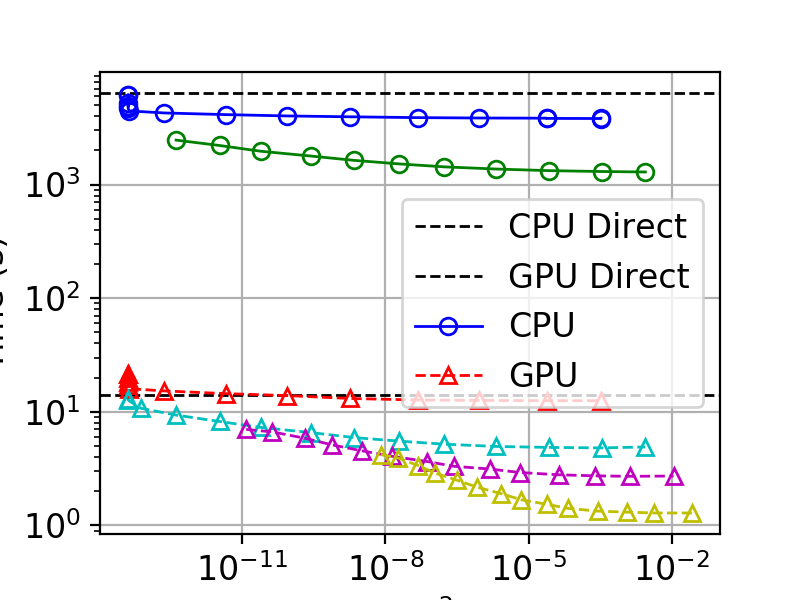

Saving figure to:  /Users/nathanvaughn/Documents/GitHub/KITC/paper-runs/plots/lagrange-yukawa.png


<IPython.core.display.Javascript object>


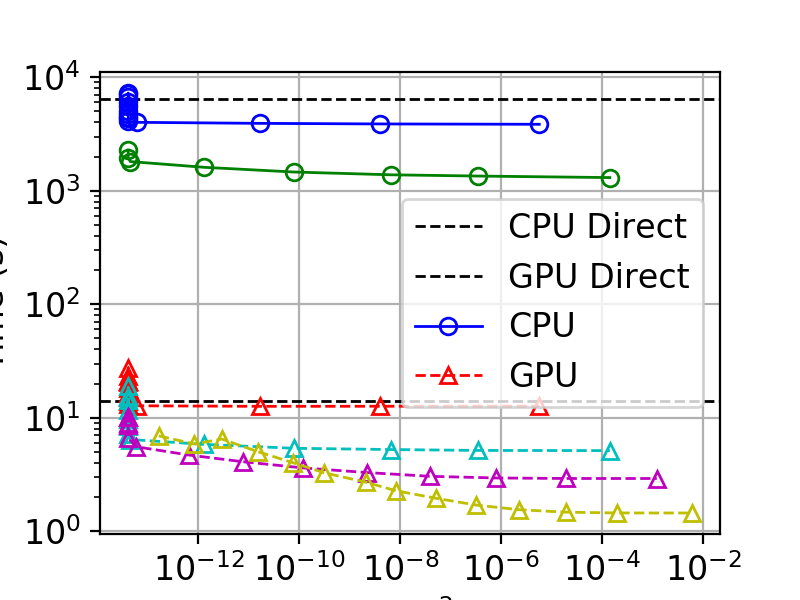

Saving figure to:  /Users/nathanvaughn/Documents/GitHub/KITC/paper-runs/plots/hermite-yukawa.png


In [219]:
## Figure 0: CPU and GPU, Lagrange and Hermite

## Load Dataframe
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/gpu_vs_cpu/1M_comparison/'
yukawa_direct_times={}
coulomb_direct_times={}

cpu_coulombFile='cpu_coulomb_lagrange.csv' 
cpu_yukawaFile='cpu_yukawa_lagrange.csv'


coulomb_direct_times["CPU Direct"]=3484.842256

gpu_coulombFile='gpu_coulomb_lagrange.csv' 
gpu_yukawaFile='gpu_yukawa_lagrange.csv' 
yukawa_direct_times["CPU Direct"] = 6399.887836
yukawa_direct_times["GPU Direct"] = 13.937960


df_cpu_coulomb = pd.read_csv(resultsDir + cpu_coulombFile, names=Header)
df_cpu_coulomb = df_cpu_coulomb.drop(df_cpu_coulomb.index[0:6])  # six duplicates at the beginning
df_cpu_yukawa = pd.read_csv(resultsDir + cpu_yukawaFile, names=Header)

df_gpu_coulomb = pd.read_csv(resultsDir + gpu_coulombFile, names=Header)
df_gpu_yukawa = pd.read_csv(resultsDir + gpu_yukawaFile, names=Header)

df_cpu_coulomb['Total-Time'] = df_cpu_coulomb["setup-time-max"] + df_cpu_coulomb["treecode-time-max"]
df_cpu_yukawa['Total-Time'] = df_cpu_yukawa["setup-time-max"] + df_cpu_yukawa["treecode-time-max"]

df_gpu_coulomb['Total-Time'] = df_gpu_coulomb["setup-time-max"] + df_gpu_coulomb["treecode-time-max"]
df_gpu_yukawa['Total-Time'] = df_gpu_yukawa["setup-time-max"] + df_gpu_yukawa["treecode-time-max"]


## Load Hermite
cpu_coulomb_hermite_File='cpu_coulomb_hermite.csv' 
cpu_yukawa_hermite_File='cpu_yukawa_hermite.csv'
gpu_coulomb_hermite_File='gpu_coulomb_hermite.csv' 
gpu_yukawa_hermite_File='gpu_yukawa_hermite.csv'

df_cpu_coulomb_hermite = pd.read_csv(resultsDir + cpu_coulomb_hermite_File, names=Header)
df_cpu_yukawa_hermite = pd.read_csv(resultsDir + cpu_yukawa_hermite_File, names=Header)
df_gpu_coulomb_hermite = pd.read_csv(resultsDir + gpu_coulomb_hermite_File, names=Header)
df_gpu_yukawa_hermite = pd.read_csv(resultsDir + gpu_yukawa_hermite_File, names=Header)

df_cpu_coulomb_hermite['Total-Time'] = df_cpu_coulomb_hermite["setup-time-max"] + df_cpu_coulomb_hermite["treecode-time-max"]
df_cpu_yukawa_hermite['Total-Time'] = df_cpu_yukawa_hermite["setup-time-max"] + df_cpu_yukawa_hermite["treecode-time-max"]
df_gpu_coulomb_hermite['Total-Time'] = df_gpu_coulomb_hermite["setup-time-max"] + df_gpu_coulomb_hermite["treecode-time-max"]
df_gpu_yukawa_hermite['Total-Time'] = df_gpu_yukawa_hermite["setup-time-max"] + df_gpu_yukawa_hermite["treecode-time-max"]


# coulomb_hlines={1668}
# yukawa_hlines={1479}


## Plotting function
def treecode_cpu_vs_gpu(df_cpu,df_gpu,A,B,C,hlines={},save=False):
    default_cycler =  ( cycler(marker=['o', '^', 's','o', '^', 's','D']) +  
                        cycler(linestyle=['-','--','-','--','-','--','-']) + 
                        cycler('color', 'bgrcmyk') )
#     default_cycler = cycler('color', 'kbgrcmy')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    df_cpu = df_cpu.sort_values(by=B)
    df_gpu = df_gpu.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(4,3))
    
    for name,val in hlines.items():
        plt.axhline(y=val, color='k', linestyle='--', label=name)

    grouped = df_cpu.groupby(C)
    templabel = "CPU"
    for name,group in grouped:
#         group.plot(x=B, y=A, ax=ax, style='-o', fillstyle='none', loglog=True,label=r'CPU: $\theta$ = %1.1f'%(name))
        group.plot(x=B, y=A, ax=ax, style='-o', fillstyle='none', loglog=True,label=templabel)
        templabel=""
        
    templabel = "GPU"        
    grouped = df_gpu.groupby(C)
    for name,group in grouped:
#         group.plot(x=B, y=A, ax=ax, style='--^', fillstyle='none', loglog=True,label=r'GPU: $\theta$ = %1.1f'%(name))
        group.plot(x=B, y=A, ax=ax, style='--^', fillstyle='none', loglog=True,label=templabel)
        templabel=""
        
    plt.xlabel('Relative $L^2$ Error')
    plt.ylabel('Time (s)')
    
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    plt.grid()    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        print('Saving figure to: ', plotsDir+saveID+'.png')
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()
coulomb_hlines
# treecode_cpu_vs_gpu(df_cpu_coulomb,df_gpu_coulomb,'Total-Time','Rel. 2-Norm Error','Theta',hlines={},save='lagrange-coulomb')
treecode_cpu_vs_gpu(df_cpu_yukawa,df_gpu_yukawa,'Total-Time','Rel. 2-Norm Error','Theta',hlines=yukawa_direct_times,save='lagrange-yukawa')
treecode_cpu_vs_gpu(df_cpu_yukawa_hermite,df_gpu_yukawa_hermite,'Total-Time','Rel. 2-Norm Error','Theta',hlines=yukawa_direct_times,save='hermite-yukawa')
# treecode_accuracy_vs_time(df_gpu_coulomb,'Total-Time','Rel. 2-Norm Error','Theta',hlines={},save='gpu-lagrange-coulomb')
# treecode_accuracy_vs_time(df_cpu_yukawa,'Total-Time','Rel. 2-Norm Error','Theta',hlines=yukawa_hlines,save='cpu-lagrange-yukawa')

<IPython.core.display.Javascript object>


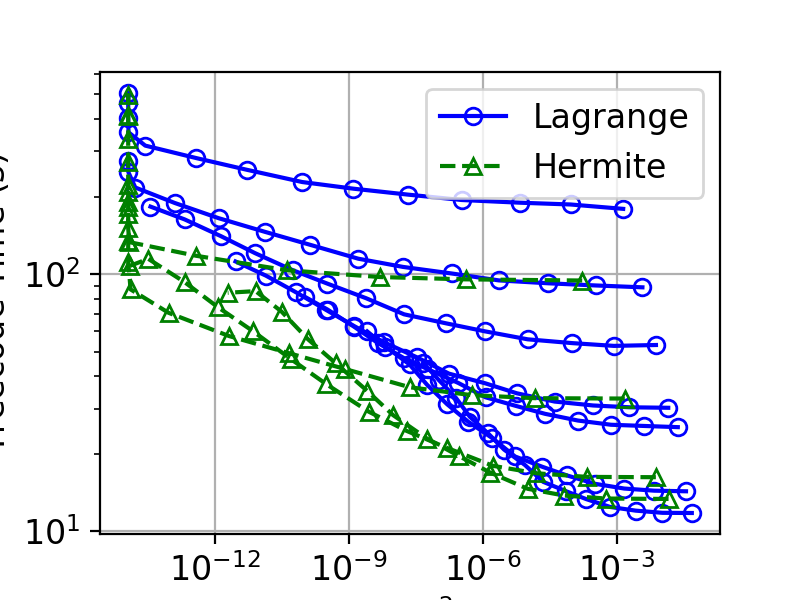

Saved plot to  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/hermite-vs-lagrange-coulomb


<IPython.core.display.Javascript object>


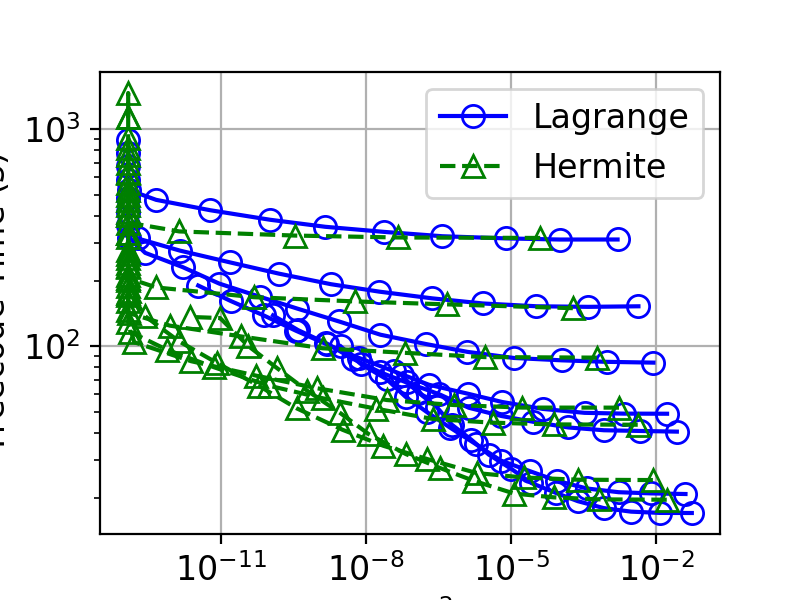

Saved plot to  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/hermite-vs-lagrange-yukawa


In [101]:
## Figure 2: Hermite vs. Lagrange accuracy vs. time

## Load Dataframe
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/treecodeVersusDirectSum/'

LCFile='coulomb.csv' 
LYFile='yukawa.csv' 
df_LC = pd.read_csv(resultsDir + LCFile, names=Header)
df_LY = pd.read_csv(resultsDir + LYFile, names=Header)

df_LC['Total-Time'] = df_LC["setup-time-max"] + df_LC["treecode-time-max"]
df_LY['Total-Time'] = df_LY["setup-time-max"] + df_LY["treecode-time-max"]

HCFile='coulomb_hermite.csv' 
HYFile='yukawa_hermite.csv' 
df_HC = pd.read_csv(resultsDir + HCFile, names=Header)
df_HY = pd.read_csv(resultsDir + HYFile, names=Header)

df_HC['Total-Time'] = df_HC["setup-time-max"] + df_HC["treecode-time-max"]
df_HY['Total-Time'] = df_HY["setup-time-max"] + df_HY["treecode-time-max"]


coulomb_hlines={1668}
yukawa_hlines={1479}


## Plotting function
def hermite_vs_lagrange(lagrange,hermite,A,B,C,save=False,hlines={}):
    lagrange_cycler = (cycler(color=['b']) *
                                  cycler(linestyle=['-'])*
                                  cycler(marker=['o']) +
                                  cycler(markersize=[8]))
    
    hermite_cycler = (cycler(color=['g']) *
                                  cycler(linestyle=['--'])*
                                  cycler(marker=['^']) +
                                  cycler(markersize=[8]))

    
    
    fig, ax = plt.subplots(figsize=(4,3))

    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=lagrange_cycler)

    for hline in hlines:
        plt.axhline(y=hline, color='r', linestyle='-',label='Direct-Sum Reference')
    
    grouped = lagrange.groupby(C)
    tempLabel='Lagrange'
    for name,group in grouped:
        group.plot(x=B, y=A, ax=ax,style='bo-', fillstyle='none', loglog=True,label=tempLabel)
        tempLabel=''
        
        
    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=hermite_cycler)
    grouped = hermite.groupby(C)
    tempLabel='Hermite'
    for name,group in grouped:
        group.plot(x=B, y=A, ax=ax,style='g^--', fillstyle='none', loglog=True,label=tempLabel)
        tempLabel=''

    plt.xlabel(r'Relative $L^2$ Error')
    plt.ylabel(r'Treecode Time $(s)$')
    
    
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')
#     plt.legend(loc = 'best').set_visible(False)
#     plt.title('Lines of Constant Theta: Stars=Hermite, Circles=Lagrange')
    if save != False:
        saveID = save
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
        print('Saved plot to ', plotsDir+save)
    plt.show()
    
    
## Plot call
hermite_vs_lagrange(df_LC,df_HC,'Total-Time','Rel. 2-Norm Error','Theta',save='hermite-vs-lagrange-coulomb',hlines={})
hermite_vs_lagrange(df_LY,df_HY,'Total-Time','Rel. 2-Norm Error','Theta',save='hermite-vs-lagrange-yukawa',hlines={})


<IPython.core.display.Javascript object>


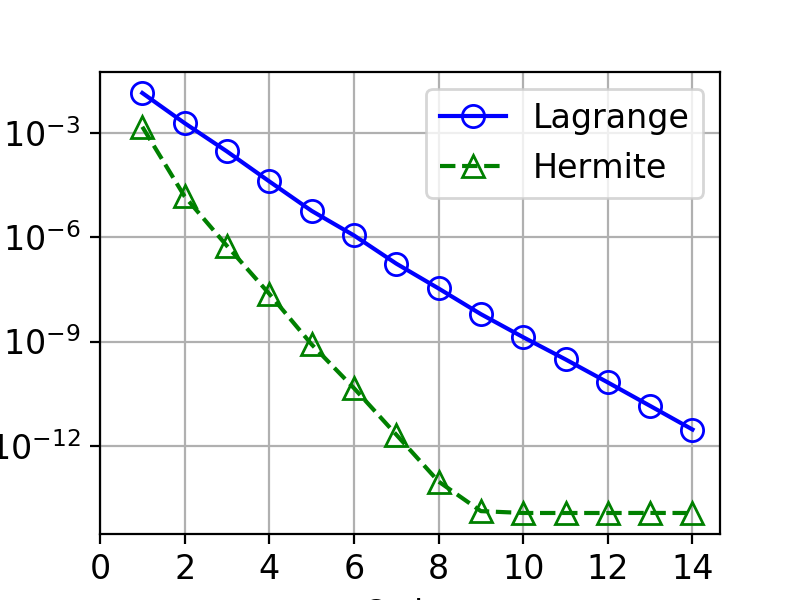

Saved plot to  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/hermite-vs-lagrange-coulomb-order


<IPython.core.display.Javascript object>


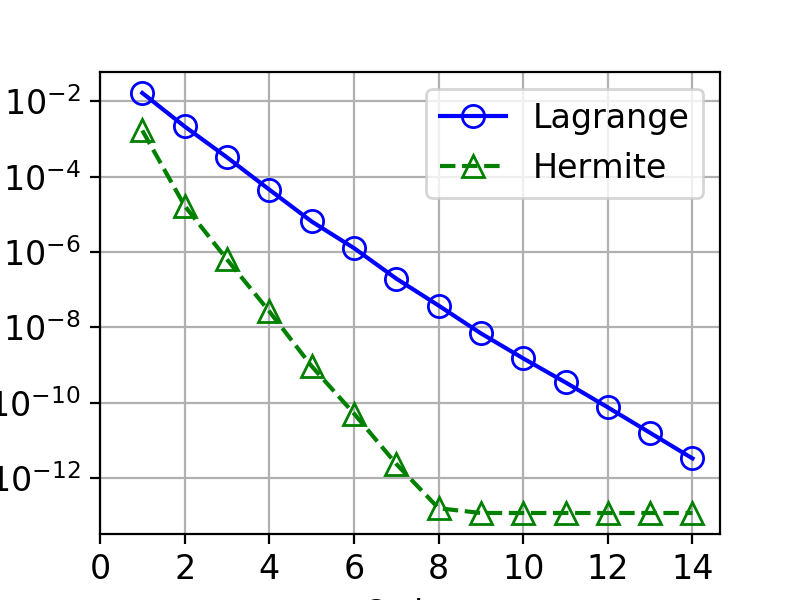

Saved plot to  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/hermite-vs-lagrange-yukawa-order


In [102]:
## Figure 3: Hermite vs. Lagrange order scaling

## Load Dataframe
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/treecodeVersusDirectSum/'

LCFile='coulomb.csv' 
LYFile='yukawa.csv' 
df_LC = pd.read_csv(resultsDir + LCFile, names=Header)
df_LY = pd.read_csv(resultsDir + LYFile, names=Header)

df_LC['Total-Time'] = df_LC["setup-time-max"] + df_LC["treecode-time-max"]
df_LY['Total-Time'] = df_LY["setup-time-max"] + df_LY["treecode-time-max"]

HCFile='coulomb_hermite.csv' 
HYFile='yukawa_hermite.csv' 
df_HC = pd.read_csv(resultsDir + HCFile, names=Header)
df_HY = pd.read_csv(resultsDir + HYFile, names=Header)

df_HC['Total-Time'] = df_HC["setup-time-max"] + df_HC["treecode-time-max"]
df_HY['Total-Time'] = df_HY["setup-time-max"] + df_HY["treecode-time-max"]


coulomb_hlines={1668}
yukawa_hlines={1479}


## Plotting function
def hermite_vs_lagrange_order_scaling(lagrange,hermite,A,B,C,save=False,hlines={}):
#     df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(4,3))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
#     lagrange = df.loc[df['PotentialType']==0]
#     hermite = df.loc[df['PotentialType']==4]
    
    order_scaling_cycler = (cycler(marker=['o','o', '^','^','s','s']) +
                                        cycler(markersize=[8,8, 8,8,5,5]) +
                                        cycler(color=['k','k','k','k','g','g']) +
                                        cycler(linestyle=['--','-','--','-','--','-']) )
    
    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=order_scaling_cycler)
    
    grouped = lagrange.groupby(C)
    tempLabel='Lagrange'
    for name,group in grouped:
        group.plot(x=B, y=A, ax=ax,style='bo-', fillstyle='none', logy=True,label=tempLabel)
        tempLabel=''
            
    grouped = hermite.groupby(C)
    tempLabel='Hermite'
    for name,group in grouped:
        group.plot(x=B, y=A, ax=ax,style='g^--', fillstyle='none', logy=True,label=tempLabel)
        tempLabel=''
        

    plt.xlabel('Order')
    plt.ylabel(r'Relative $L^2$ Error')
    
    for hline in hlines:
        plt.axhline(y=hline, color='k', linestyle='-.',label='Direct-Sum Reference')
    plt.grid()
#     plt.ylim([20,100])

    plt.xticks(np.arange(0, 15, step=2))
    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
        print('Saved plot to ', plotsDir+save)
    plt.show()
    
    
## Plot call
thetaList = [0.6]
df_LC = df_LC.loc[df_LC['Theta'].isin(thetaList)]
df_HC = df_HC.loc[df_HC['Theta'].isin(thetaList)]
df_LY = df_LY.loc[df_LY['Theta'].isin(thetaList)]
df_HY = df_HY.loc[df_HY['Theta'].isin(thetaList)]

hermite_vs_lagrange_order_scaling(df_LC,df_HC,'Rel. 2-Norm Error','Order','Theta',save='hermite-vs-lagrange-coulomb-order',hlines={})
hermite_vs_lagrange_order_scaling(df_LY,df_HY,'Rel. 2-Norm Error','Order','Theta',save='hermite-vs-lagrange-yukawa-order',hlines={})


<IPython.core.display.Javascript object>


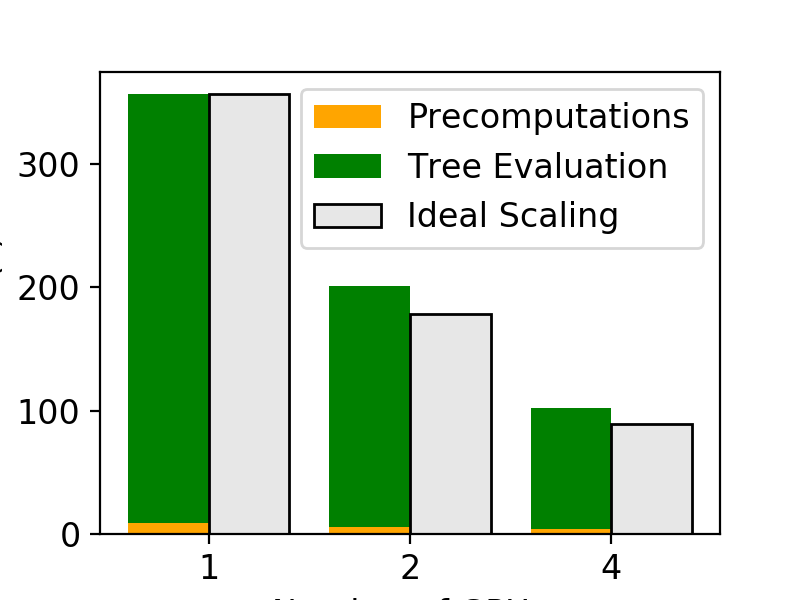

[356.34817  200.929618 101.899499]
Saving figure to:  /Users/nathanvaughn/Documents/GitHub/KITC/paper-runs/plots/parallel-scaling-bar.png


<IPython.core.display.Javascript object>


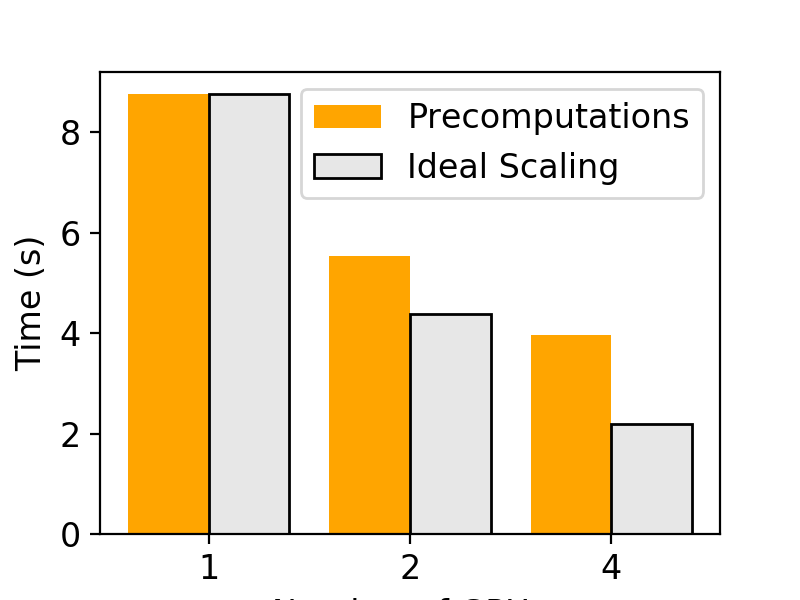

Saving figure to:  /Users/nathanvaughn/Documents/GitHub/KITC/paper-runs/plots/parallel-scaling-bar-precompute.png


<IPython.core.display.Javascript object>


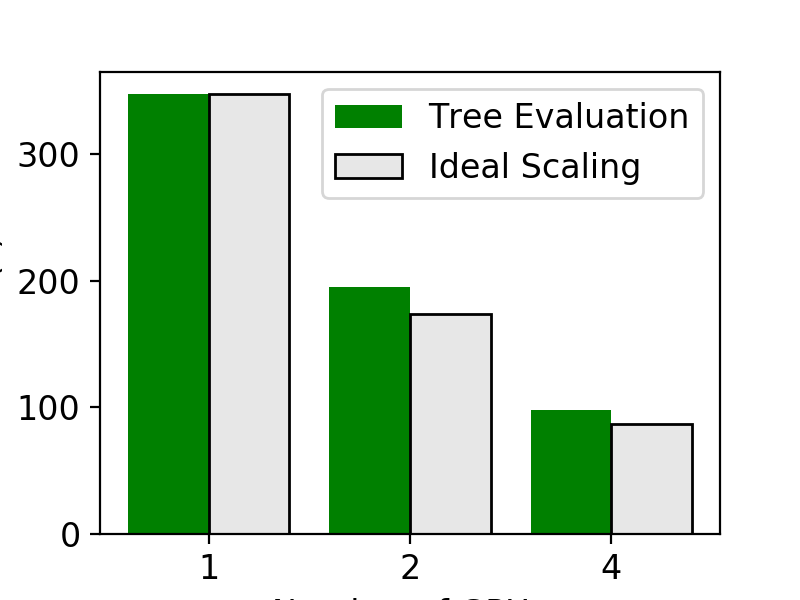

Saving figure to:  /Users/nathanvaughn/Documents/GitHub/KITC/paper-runs/plots/parallel-scaling-bar-treeeval.png


In [200]:
## Parallel Scalinng Bar Graphs
fig, ax = plt.subplots(figsize=(4,3))

# Data
N = 3
treeEval = np.array([347.585305, 195.389359, 97.92982])
modifiedWeights = np.array([8.762865, 5.540259, 3.969679])
totalTime = np.array([356.34817,200.929618,101.899499])

idealTreeEval = treeEval[0]*np.ones(3) / np.array([1,2,4])
idealModifiedWeights = modifiedWeights[0]*np.ones(3) / np.array([1,2,4])
idealTotalTime = totalTime[0]*np.ones(3) / np.array([1,2,4])
print(totalTime)
ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind-0.2, modifiedWeights, width, align='center', color=("orange"), label="Precomputations")
p2 = plt.bar(ind-0.2, treeEval, width, align='center', color=("green"), bottom=modifiedWeights, label="Tree Evaluation")

# p3 = plt.bar(ind+0.25, idealModifiedWeights, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="Ideal Scaling",edgecolor='black')
# p4 = plt.bar(ind+0.25, idealTreeEval, width, align='center',color=(0.1, 0.1, 0.1, 0.1), bottom=idealModifiedWeights, label="Ideal Scaling",edgecolor='black')
p4 = plt.bar(ind+0.2, idealTotalTime, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="Ideal Scaling",edgecolor='black')

plt.legend()
plt.xticks(ind, ('1', '2', '4'))
plt.ylabel('Time (s)')
plt.xlabel('Number of GPUs')

saveID='parallel-scaling-bar'
print('Saving figure to: ', plotsDir+saveID+'.png')
plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)

# treePercent=100*treeEval/totalTime
# weightsPercent=100*modifiedWeights/totalTime
# fig, ax = plt.subplots(figsize=(4,3))
# p1 = plt.bar(ind, weightsPercent, width, label="Precomputations")
# p2 = plt.bar(ind, treePercent, width, bottom=weightsPercent, label="Tree Evaluation")
# plt.legend()
# plt.xticks(ind, ('1', '2', '4'))
# plt.ylabel('Percentage of Total Time')
# plt.xlabel('Number of GPUs')
# plt.ylim([0,100])
# # p3 = plt.bar(ind, modifiedWeights, width)

fig, ax = plt.subplots(figsize=(4,3))
p1 = plt.bar(ind-0.2, modifiedWeights, width, align='center', color=("orange"), label="Precomputations")
p3 = plt.bar(ind+0.2, idealModifiedWeights, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="Ideal Scaling",edgecolor='black')
plt.legend()
plt.xticks(ind, ('1', '2', '4'))
plt.ylabel('Time (s)')
plt.xlabel('Number of GPUs')
saveID='parallel-scaling-bar-precompute'
print('Saving figure to: ', plotsDir+saveID+'.png')
plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)

fig, ax = plt.subplots(figsize=(4,3))
p2 = plt.bar(ind-0.2, treeEval, width, align='center', color=("green"), label="Tree Evaluation")
p4 = plt.bar(ind+0.2, idealTreeEval, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="Ideal Scaling",edgecolor='black')
plt.legend()
plt.xticks(ind, ('1', '2', '4'))
plt.ylabel('Time (s)')
plt.xlabel('Number of GPUs')
saveID='parallel-scaling-bar-treeeval'
print('Saving figure to: ', plotsDir+saveID+'.png')
plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)

## Load Dataframe
plotsDir='/Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/'
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/hermiteTesting/coulomb/'

## Compare to Lagrange
resultsFile='hermite_vs_lagrange_gpu_yesCheck_10000000.csv'


## Batch-Size Study
# resultsFile='hermite_batch_node_size_1000000.csv'
# resultsFile='hermite_coarse_batch_node_size_10000000.csv'
# resultsFile='hermite_batch_node_size_10000000.csv'
# resultsFile='K40_hermite_batch_node_size_1000000.csv'

# GPU Parallelization
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/parallelGPU/'
# # resultsFile='TitanV_Lagrange_GPU_parallelized_1000000.csv'
# resultsFile='TitanV_Lagrange_yukawaSS_10000000.csv'
# # resultsFile='K20_hermite_GPU_parallelized_1000000.csv'
# # resultsFile='K20_hermite_GPU_parallelized_10000000.csv'
# # resultsFile='TitanV_hermite_GPU_parallelized_1000000.csv'
# # resultsFile='TitanV_hermite_GPU_parallelized_10000000.csv'
# # resultsFile='TitanV_hermite_GPU_parallelized_nonStatic_1000000.csv'
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/gpu_vs_cpu/'
# resultsFile='guided_theta_and_order_10000000.csv'
resultsFile='batchSize_5k_10000000.csv'
resultsFile='batchSize_10k_10000000.csv'

## Compare GPU Lagrange to CPU
# # resultsFile='TitanV_Coulomb_1000000.csv' 
# resultsFile='TitanV_Coulomb_10000000.csv' 
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/gpu_vs_cpu/'



df = pd.read_csv(resultsDir + resultsFile, names=Header)


In [37]:
## Plotting functions


def treecode_accuracy_vs_time(df,A,B,C,save=False,hlines={}):
#     treecode_accuracy_vs_time_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
#                                    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) *
#                   cycler(linestyle=['--']) *
#                   cycler(marker=['o', '*']) )
    
    treecode_accuracy_vs_time_cycler = (cycler(marker=['o','o', '^','^','s','s']) +
                                        cycler(markersize=[8,8, 8,8,6,6]) +
#                                         cycler(color=['r','g','b','c','m','y']) +
                                        cycler(color=['k','k','k','k','k','k']) +
                                        cycler(linestyle=['--','-','--','-','--','-']) )
    
#     marker = itertools.cycle((',', '+', '.', 'o', '*'))
#     ['C1','C2','C3','C4','C5','C6']

    
    
    fig, ax = plt.subplots(figsize=(8,6))

    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=treecode_accuracy_vs_time_cycler)
    
    lagrange = df.loc[df['PotentialType']==0]
#     hermite = df.loc[df['PotentialType']==4]
    
    for hline in hlines:
        plt.axhline(y=hline, color='k', linestyle='-.',label='Direct-Sum Reference')
    
    grouped = lagrange.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='%s = %1.1f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='%s = %i'%(C,name))
            
#     grouped = hermite.groupby(C)
#     for name,group in grouped:
#         if isinstance(name,str):
#             group.plot(x=B, y=A, ax=ax, loglog=True,label='Hermite: %s = %s'%(C,name))
#         elif isinstance(name,float):
#             group.plot(x=B, y=A, ax=ax, loglog=True,label='Hermite: %s = %f'%(C,name))
#         elif isinstance(name,int):
#             group.plot(x=B, y=A, ax=ax, loglog=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel(r'Relative $L^2$ Error')
    plt.ylabel(r'Treecode Time $(s)$')
    
    
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')
#     plt.legend(loc = 'best').set_visible(False)
#     plt.title('Lines of Constant Theta: Stars=Hermite, Circles=Lagrange')
    if save != False:
        saveID = save
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
        print('Saved plot to ', plotsDir+save)
    plt.show()
    
def hermite_vs_lagrange(df,A,B,C,save=False,hlines={}):
    lagrange_cycler = (cycler(color=['k']) *
                                  cycler(linestyle=['-'])*
                                  cycler(marker=['o']) +
                                  cycler(markersize=[8]))
    
    hermite_cycler = (cycler(color=['k']) *
                                  cycler(linestyle=['--'])*
                                  cycler(marker=['^']) +
                                  cycler(markersize=[8]))

    
    
    fig, ax = plt.subplots(figsize=(8,6))

    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=lagrange_cycler)
    
    lagrange = df.loc[df['PotentialType']==0]
    hermite = df.loc[df['PotentialType']==4]
    
    for hline in hlines:
        plt.axhline(y=hline, color='r', linestyle='-',label='Direct-Sum Reference')
    
    grouped = lagrange.groupby(C)
    tempLabel='Lagrange'
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='Lagrange: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, style='k-', loglog=True,label=tempLabel)
            tempLabel=''
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='Lagrange: %s = %i'%(C,name))
            
    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=hermite_cycler)
    grouped = hermite.groupby(C)
    tempLabel='Hermite'
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='Hermite: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, style='k--', loglog=True,label=tempLabel)
            tempLabel=''
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, loglog=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel(r'Relative $L^2$ Error')
    plt.ylabel(r'Treecode Time $(s)$')
    
    
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')
#     plt.legend(loc = 'best').set_visible(False)
#     plt.title('Lines of Constant Theta: Stars=Hermite, Circles=Lagrange')
    if save != False:
        saveID = save
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
        print('Saved plot to ', plotsDir+save)
    plt.show()
    
def numDeviceComparison(df,A,B,C,save=False,hlines={}):
    fig, ax = plt.subplots(figsize=(8,6))
    single = df.loc[df['NumDevices']==1]
    double = df.loc[df['NumDevices']==2]
    
    default_cycler = (cycler(color=['r', 'g', 'b']) +
                  cycler(linestyle=['-', '-', '-']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)


    grouped = single.groupby(C)
#     n = len(group[B])
#     print(n)
#     color=cm.rainbow(np.linspace(0,1,n))
#     print(color)
#     colorIdx=0
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='1 GPU: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='1 GPU: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='1 GPU: %s = %i'%(C,name))
            
            
    default_cycler = (cycler(color=['r', 'g', 'b']) +
                  cycler(linestyle=['--', '--', '--']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    grouped = double.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='2 GPUs: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='2 GPUs: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='2 GPUs: %s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    for hline in hlines:
#     plt.axhline(y=62.6, color='r', linestyle='-')
        plt.axhline(y=hline, color='r', linestyle='-')
#         plt.axhline(y=1698, color='r', linestyle='-') # for 10 million
#     plt.axhline(y=10**6, color='r', linestyle='--') # CPU DS for 10 million
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')
#     plt.legend(loc = 'best').set_visible(False)
#     plt.title('Lines of Constant Theta: Stars=Hermite, Circles=Lagrange')
    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
        
        
def parallelEfficiency(df,A,B,C,save=False,hlines={}):
    fig, ax = plt.subplots(figsize=(8,6))
    single = df.loc[df['NumDevices']==1]
    double = df.loc[df['NumDevices']==2]
    
    default_cycler = (cycler(color=['r', 'g', 'b']) +
                  cycler(linestyle=['-', '-', '-']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
#     plt.figure()
    grouped1 = single.groupby(C)
    grouped2 = double.groupby(C)
    for name1,group1 in grouped1:
        for name2,group2 in grouped2:
            if name1==name2:
                times1 = group1['Total-Time'].values
                times2 = group2['Total-Time'].values
                
                errors = group1['Rel. 2-Norm Error']
                if len(times2)<len(times1):
                    times1 = times1[:len(times2)]
                    errors = errors[:len(times2)]
                ratio = times1/times2 / 2
                
                plt.semilogx(errors,ratio, 'o-', label='Theta = %f'%(name1))
    
    plt.legend()
    plt.xlabel('Rel. 2-Norm Error')
    plt.ylabel('Parallel Efficiency')
    
    if save != False:
        saveID = save
        plt.savefig(saveID+'_ratios.png', bbox_inches='tight',format='png', dpi=500)
        
        
    plt.show()
    
def directSumTitanParallel(save=False):
    sizes = np.array([10**5, 10**6, 10**7])
    times1 = np.array([0.500521, 11.86172, 1252.688545])
    times2 = np.array([0.697324, 6.388148, 627.638747])
    efficiency = times1/times2/2
    
    plt.figure()
    plt.loglog(sizes,times1,'-ro',label='1 TitanV GPU')
    plt.loglog(sizes,times2,'-bo',label='2 TitanV GPUs')
    plt.legend()
    plt.xlabel('Number of Particles')
    plt.ylabel('Direct Sum Time (s)')
    plt.title('Random Points in a Box')
    if save != False:
        saveID = save
        plt.savefig(saveID+'_times.png', bbox_inches='tight',format='png')
        
    plt.figure()
    plt.semilogx(sizes,efficiency,'-o')
    plt.xlabel('Number of Particles')
    plt.ylabel('Parallel Efficiency')
    plt.title('Parallel Efficiency of Direct Sum on TitanV GPU')
    if save != False:
        saveID = save
        plt.savefig(saveID+'_efficiency.png', bbox_inches='tight',format='png', dpi=500)
    
    plt.show()
    
    
    
def hermite_vs_lagrange_order_scaling(df,A,B,C,save=False,hlines={}):
#     df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    lagrange = df.loc[df['PotentialType']==0]
    hermite = df.loc[df['PotentialType']==4]
    
    order_scaling_cycler = (cycler(marker=['o','o', '^','^','s','s']) +
                                        cycler(markersize=[8,8, 8,8,5,5]) +
                                        cycler(color=['k','k','k','k','g','g']) +
                                        cycler(linestyle=['--','-','--','-','--','-']) )
    
    plt.rc('lines', linewidth=1.5)
    plt.rc('axes', prop_cycle=order_scaling_cycler)
    
    grouped = lagrange.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Lagrange: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Lagrange: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Lagrange: %s = %i'%(C,name))
            
    grouped = hermite.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Hermite: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Hermite: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, ax=ax, logy=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel('Order')
    plt.ylabel(r'Relative $L^2$ Error')
    
    for hline in hlines:
        plt.axhline(y=hline, color='k', linestyle='-.',label='Direct-Sum Reference')
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
        print('Saved plot to ', plotsDir+save)
    plt.show()
    
def NodeSizeVsBatchSize(df,save=False):
    nodeSizes = np.sort(df['MaxParNode'].unique())
    batchSizes = np.sort(df['BatchSize'].unique())
    
#     print('Node Sizes: ', nodeSizes)
#     print('Batch Sizes: ', batchSizes)
    times = np.zeros((len(nodeSizes),len(batchSizes)))
    accuracy = np.ones((len(nodeSizes),len(batchSizes)))

    for index, row in df.iterrows():
        for i in range(len(nodeSizes)):
            for j in range(len(batchSizes)):
                if ( (row['MaxParNode'] == nodeSizes[i]) and (row['BatchSize']==batchSizes[j]) ):
                    times[i,j] = row['TreecodeTime']
                    accuracy[i,j] = row['Rel. 2-Norm Error']

    print(times)
#     print(accuracy)
    plt.figure()
    plt.title('Time (seconds)')
    plt.xscale('log')
    plt.yscale('log')
    plt.pcolormesh(batchSizes, nodeSizes, times, cmap='PuBu', vmin=0, vmax=np.max(times))
#     plt.pcolormesh(batchSizes, nodeSizes, times, cmap='PuBu',shading='gouraud', vmin=0, vmax=np.max(times))

    plt.xlabel('Batch Size')
    plt.ylabel('Cluster Size Parameter')
    plt.colorbar()
    
    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
        
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.pcolormesh(batchSizes, nodeSizes, np.log10(accuracy), cmap='PuBu', vmin=-13, vmax=-9)

    plt.title('Log(L2 Error)')
    plt.xlabel('Batch Size')
    plt.ylabel('Cluster Size Parameter')
    plt.colorbar()
    
    if save != False:
        saveID = save
        plt.savefig(saveID+'_and_accuracy.png', bbox_inches='tight',format='png', dpi=500)
        
    plt.show()

<IPython.core.display.Javascript object>


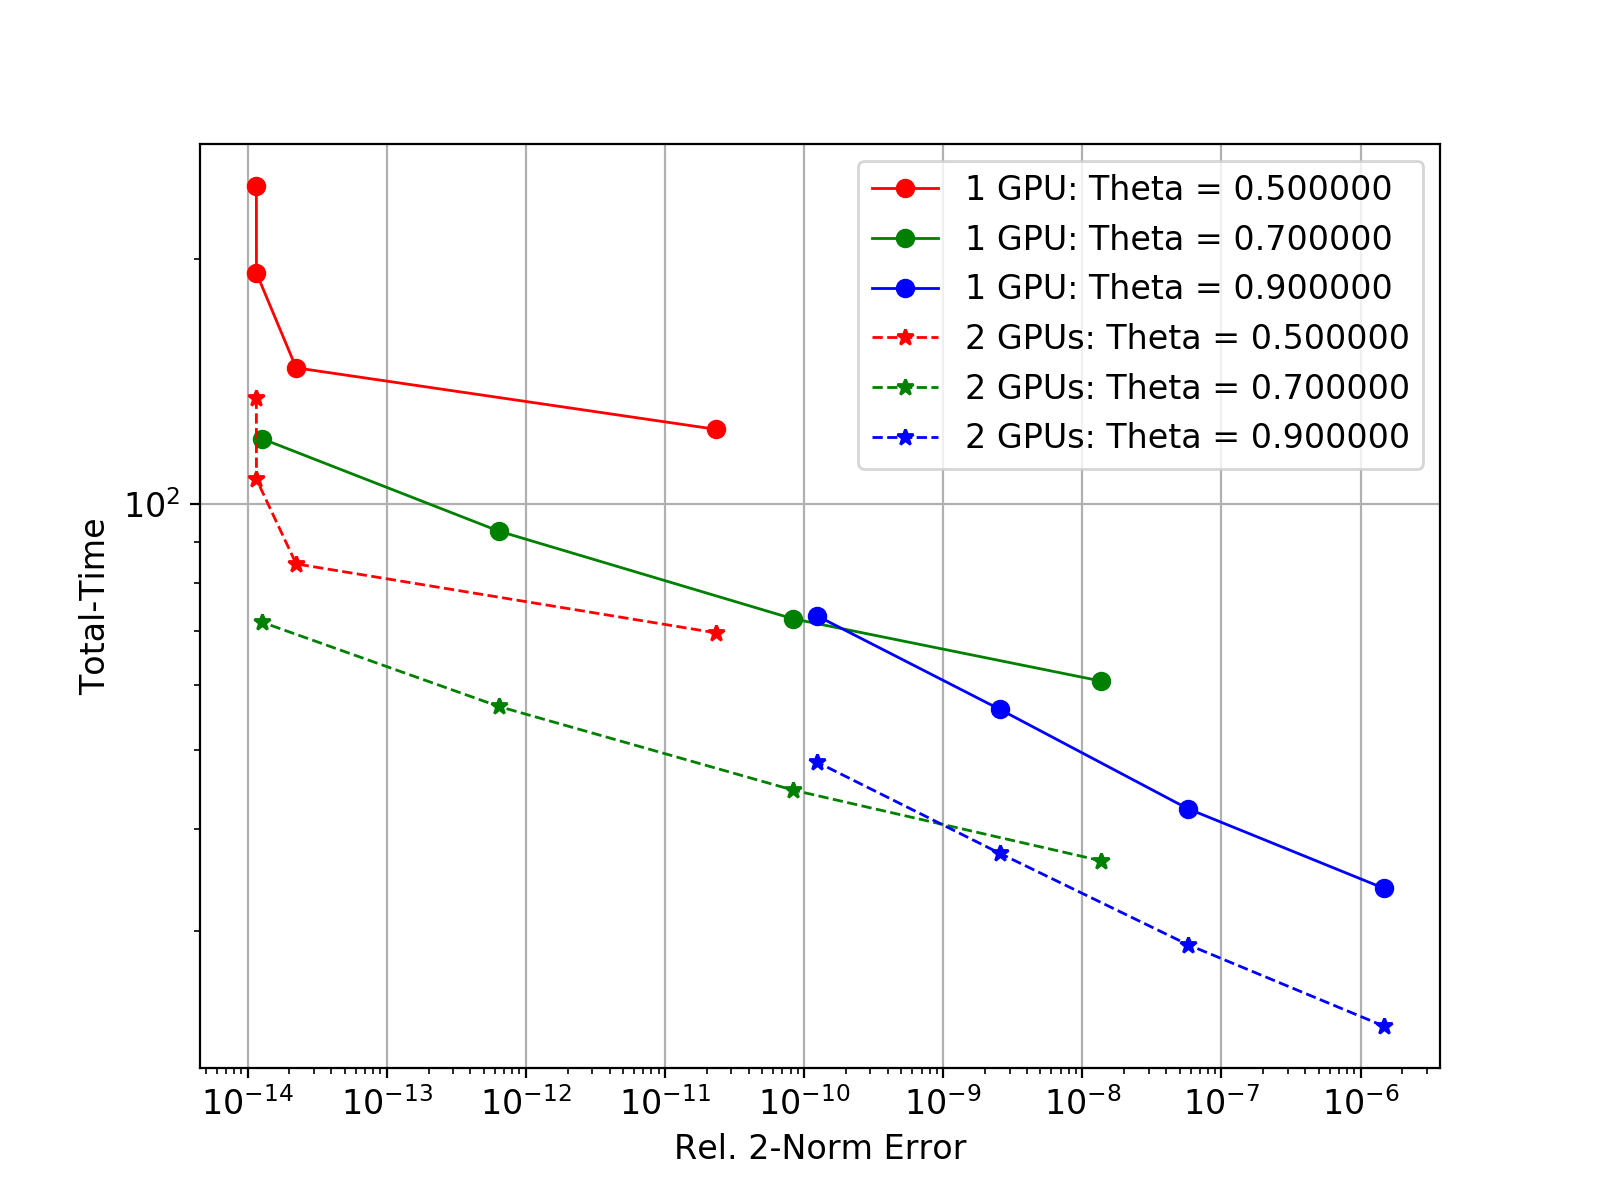

<IPython.core.display.Javascript object>


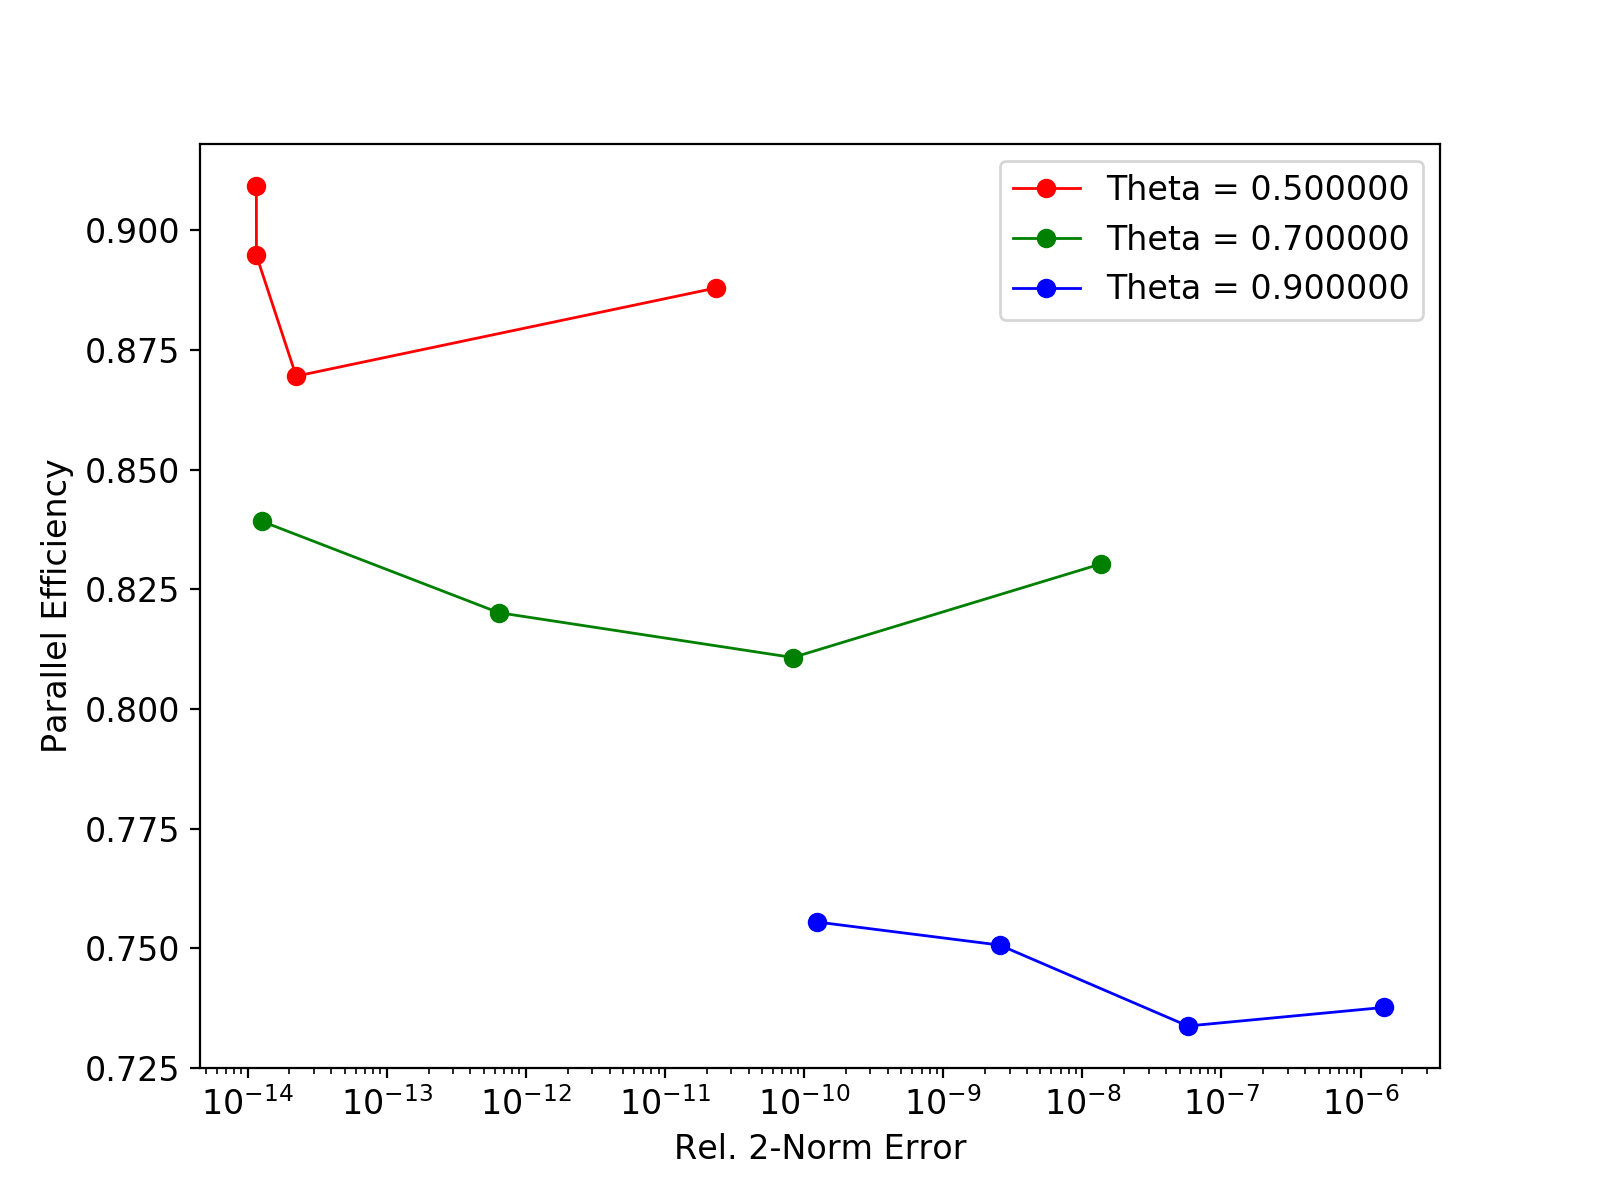

In [38]:
## Hermite GPU Parallelization Results

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/06-06-2019/random/'


df2 = df.sort_values(by=['Order'])
df2['Total-Time'] = df2["setup-time-max"] + df2["treecode-time-max"]

# df2 = df2.sort_values(by=['BatchSize'])
# df2 = df2 = df2.loc[df['Rel. 2-Norm Error']<0.03]
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={63,125}, save=saveDir+'K20_1M_timing')
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={6337,12674}, save=saveDir+'K20_10M_timing')
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={627.638747,1252.688545}, save=saveDir+'TitanV_10M_timing')
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta', save=saveDir+'TitanV_1M_timing')
# directSumTitanParallel(save=saveDir+'directSumTitan')

# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta', hlines={733,1466},save=saveDir+'Lagrange_YukawaSS_TitanV_10M')
numDeviceComparison(df2,'Total-Time','Rel. 2-Norm Error','Theta')
parallelEfficiency(df2,'Total-Time','Rel. 2-Norm Error','Theta')

<IPython.core.display.Javascript object>


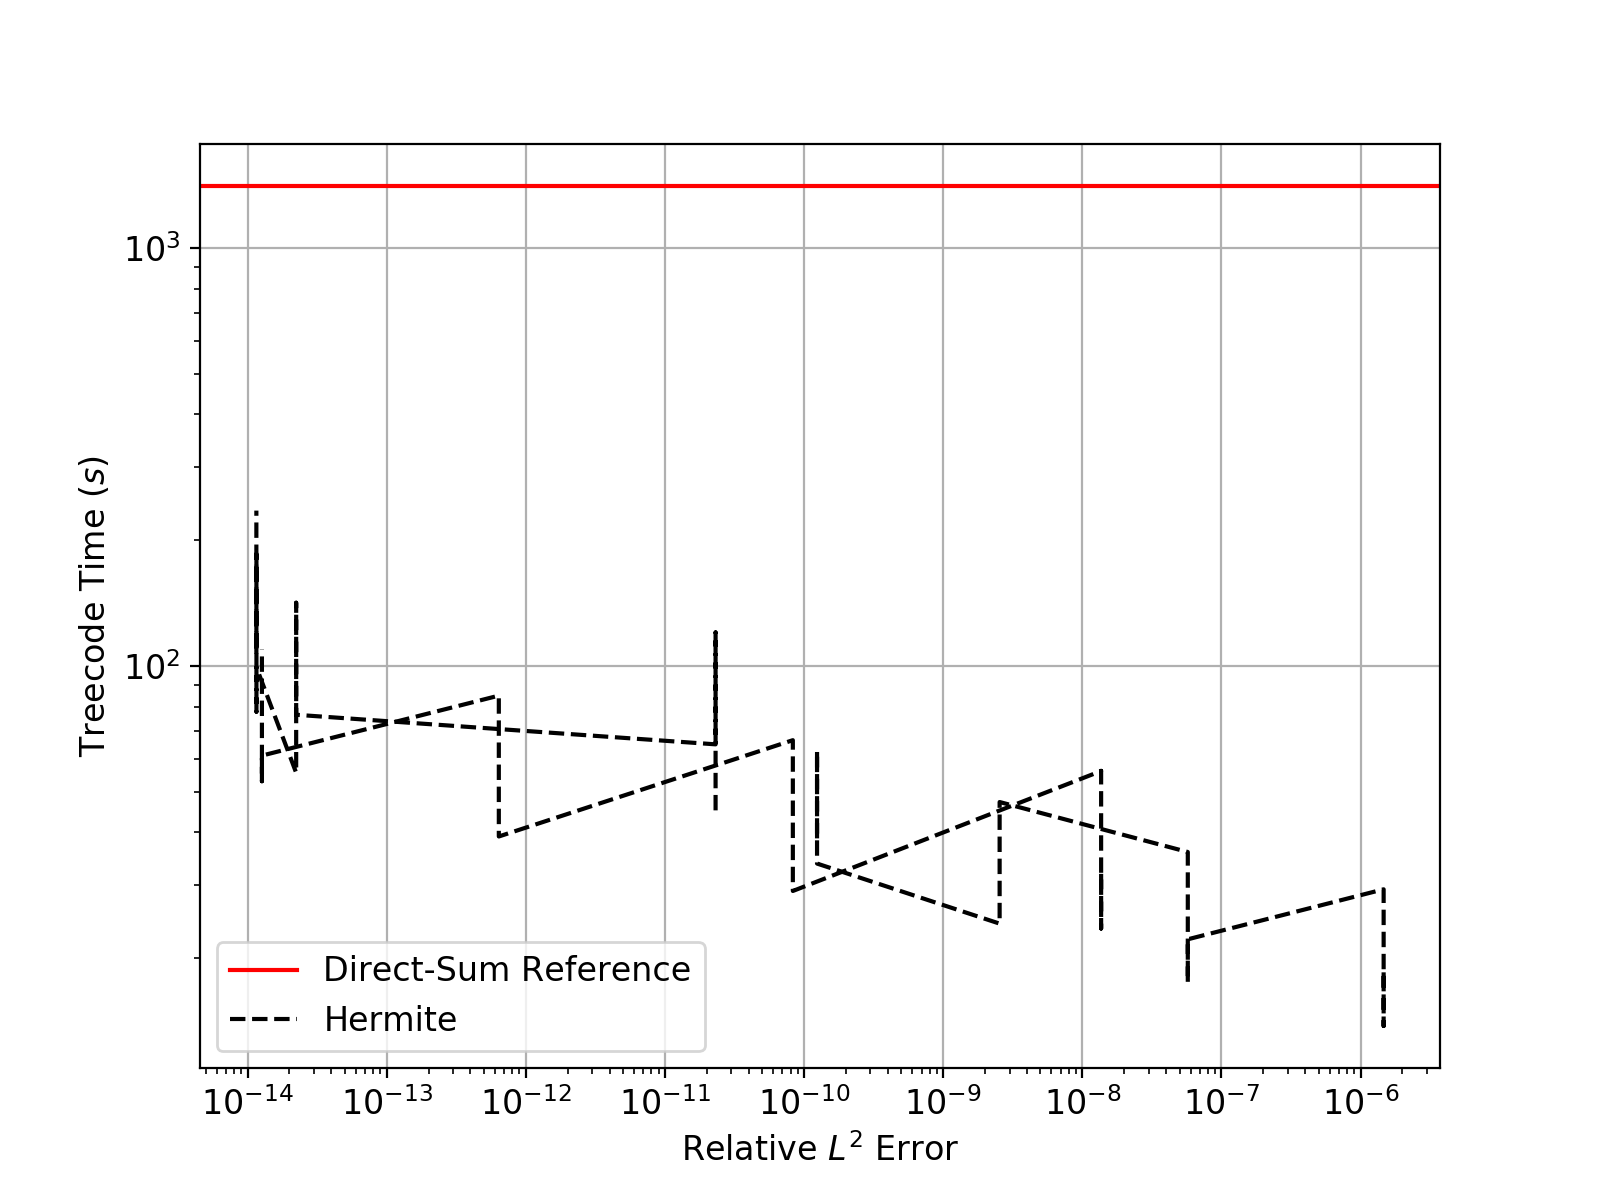

Saved plot to  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/hermite-vs-lagrange


In [80]:
## Hermite-vs-Lagrange Random Particle Calculation

# saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/06-06-2019/random/'
df = df.sort_values(by=['Theta'],ascending=False)
df = df.sort_values(by=['Order'])
# df2 = df2.loc[df['Theta']==0.7]
df2 = df.loc[df['Theta'].isin([0.4,0.7])]

# logAversusLogBcolorbyC(df2,'TreecodeTime','RelativeError','Order',save=saveDir+'10mil_PotentialError_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','inferr','Order',save=saveDir+'10mil_InfError_order7')

# logAversusLogBcolorbyC(df2,'inferr','Order','Theta',save=saveDir+'100k_PvsT_order8_inferr')
# logAversusLogBcolorbyC(df2,'Rel. 2-Norm Error','Order','Theta')
# hermite_vs_lagrange_order_scaling(df2,'Rel. 2-Norm Error','Order','Theta',save='temp')
# logAversusBcolorbyC(df2,'inferr','Order','Theta')

hermite_vs_lagrange(df,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={1408}, save='hermite-vs-lagrange')
# hermite_vs_lagrange_order_scaling(df2,'Rel. 2-Norm Error','Order','Theta',save='hermite-order-scaling')



[[54.538106 54.70698   0.       ... 54.959622 54.910213 61.17214 ]
 [54.717266 54.728573  0.       ... 54.954366 54.993749 61.230108]
 [ 0.        0.       54.787693 ...  0.        0.        0.      ]
 ...
 [36.711663 36.765986  0.       ... 38.175241 38.168968  0.      ]
 [36.964648 37.054717  0.       ... 39.126178 39.118615  0.      ]
 [37.485451 37.45451   0.       ... 44.04676  44.03316   0.      ]]


<IPython.core.display.Javascript object>


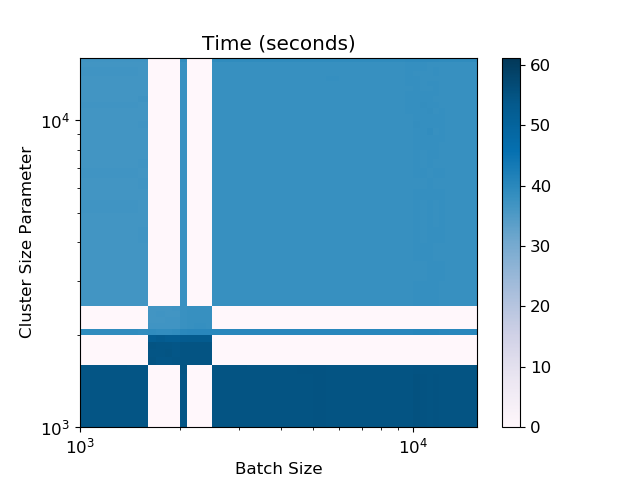

<IPython.core.display.Javascript object>


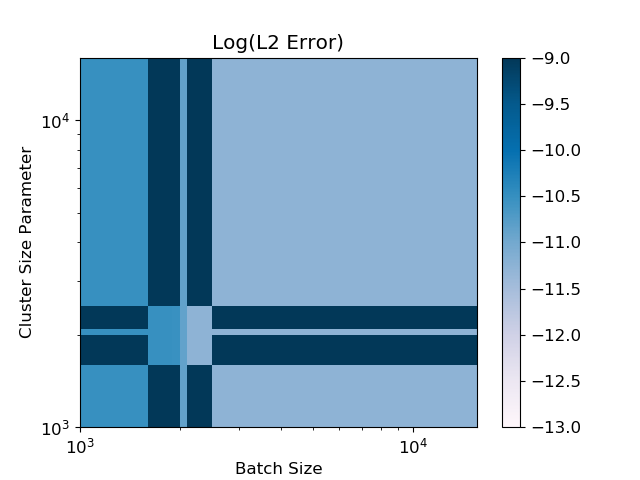

In [27]:
## Hermite Batch-Size Study Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/06-06-2019/random/'
df2 = df.sort_values(by=['MaxParNode'])
df2 = df2.loc[df2['Theta'] == 0.7]
df2 = df2.loc[df2['Order'] == 7]


NodeSizeVsBatchSize(df2, save=saveDir+'titan_1M_heatmap_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','BatchSize',hline=11.7, save=saveDir+'1M_batchSize')
# logAversusLogBcolorbyC(df2,'TreecodeTime','MaxParNode','BatchSize',hline=11.7, save=saveDir+'1M_MaxParNode')


In [246]:
## Hartree Potential Calculation

# # saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
# saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/Hartree/'
# # df = df.loc[df['Theta']<0.85]
# # df = df.loc[df['BatchSize']==10000]
# df.sort_values(by=['Theta'], inplace=True)
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order',save=saveDir+'2.3mil_totalPotential')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'2.3mil_2Norm')
# logAversusLogBcolorbyC(df,'TreecodeTime','inferr','Order',save=saveDir+'2.3mil_InfErr')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm')
# logAversusLogBcolorbyC(df,'TreecodeTime','Theta','Order')
# logAversusLogBcolorbyC(df,'inferr','Theta','Order')
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','BatchSize')


<IPython.core.display.Javascript object>


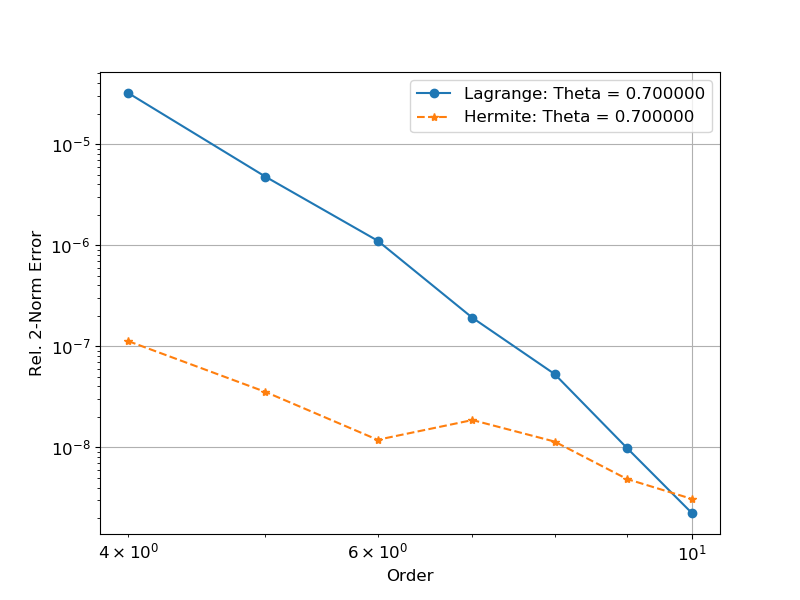

In [420]:
## Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
df = df.loc[df['BatchSize']==10000]
df = df.loc[df['Theta']==0.7]
df = df.sort_values(by=['Order'])
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order',save=saveDir+'10mil_PotentialError_order7')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm_order7')
# logAversusLogBcolorbyC(df,'TreecodeTime','inferr','Order',save=saveDir+'10mil_InfError_order7')

# logAversusLogBcolorbyC(df,'TreecodeTime','Theta','Order',save=saveDir+'10mil_PvsT_order8_time')
# logAversusLogBcolorbyC(df,'inferr','Theta','Order',save=saveDir+'10mil_PvsT_order8_inferr')
# logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Theta','Order',save=saveDir+'10mil_PvsT_order8_L2err')

# logAversusLogBcolorbyC(df,'TreecodeTime','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_time')
# logAversusLogBcolorbyC(df,'inferr','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_inferr')
logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_L2err')

# logAversusLogBcolorbyC(df,'TreecodeTime','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_time')
# logAversusLogBcolorbyC(df,'inferr','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_inferr')
# logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_L2err')

# df = df.sort_values(by=['Theta'])
# # logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order')


<IPython.core.display.Javascript object>


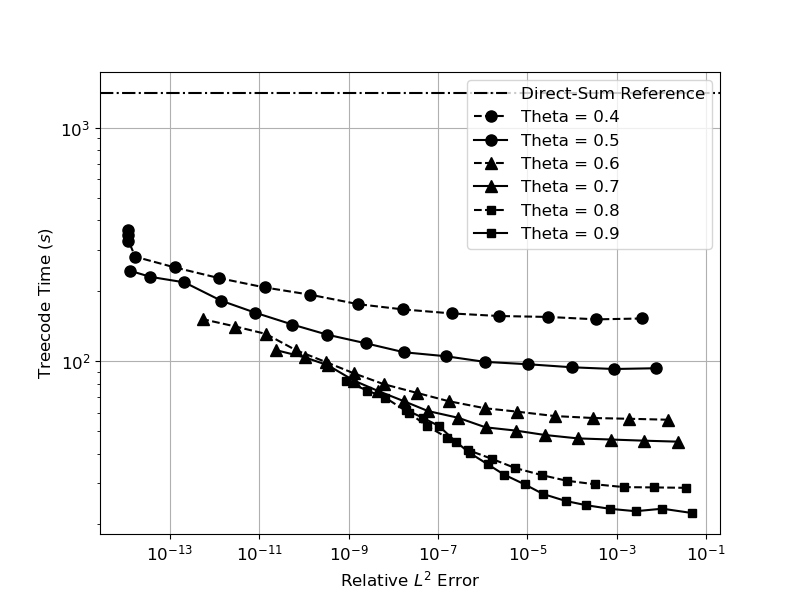

Saved plot to  /Users/nathanvaughn/Documents/GitHub/openACC-treecode/paper-runs/plots/treecode-accuracy


In [27]:
## Compare Lagrange to CPU and Direct Sum

treecode_accuracy_vs_time(df,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={1408},save='treecode-accuracy')


In [37]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['r', 'r', 'g', 'g', 'b', 'b', 'c', 'c', 'm', 'm']
